<a href="https://colab.research.google.com/github/ManavKaul/Black-Friday-Sale/blob/main/Black_Friday_Sale_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
#Importing the Black Friday Sales Data from Kaggle
df= pd.read_csv('BlackFriday.csv')

In [93]:
df.shape

(537577, 12)

* ***There are 537,577 sales entries***

In [94]:
#Reading the top 5 rows of data
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [95]:
#Reading the last 5 rows of data
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


# **AGE**

In [107]:
print(df["Age"].unique())

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [96]:
AgesGroup =df[['Age', 'Purchase']].groupby(['Age'],sort = True).count()

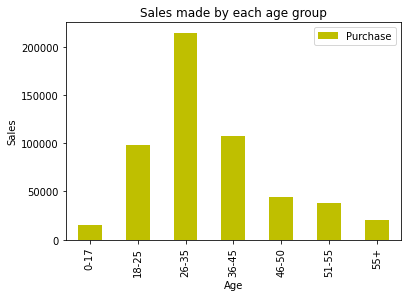

In [142]:
AgesGroup.plot(kind='bar', color=['y'])
plt.ylabel('Sales')
plt.title("Sales made by each age group")
plt.show()

# **Gender**

In [106]:
print(df["Gender"].unique())

['F' 'M']


All Entries of the data belong to either Male gender or Female gender


In [98]:
GenderGroup =df[['Gender', 'Purchase']].groupby(['Gender'],sort = True).count()

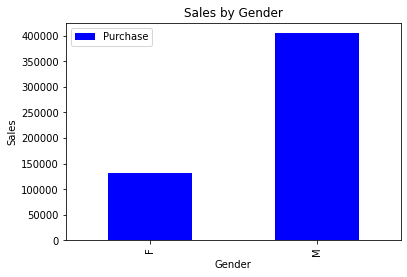

In [138]:
GenderGroup.plot(kind='bar',color=['b'],ylabel='Sales',title='Sales by Gender')
plt.show()

# **Market Segmentation (On the basis of Age and Gender)**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


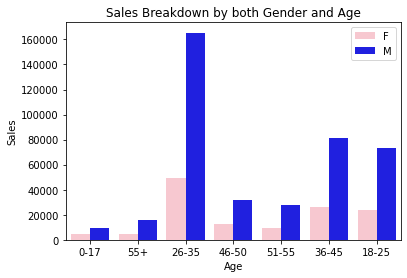

In [137]:
sns.countplot(df['Age'],hue=df['Gender'],palette =['pink','b'])
plt.xlabel("Age")
plt.ylabel("Sales")
plt.legend()
plt.title("Sales Breakdown by both Gender and Age")
plt.show()

# **CITY**

In [108]:
print(df['City_Category'].unique())

['A' 'C' 'B']


The Cities are divided into 3 categories: A, B & C

In [143]:
City_A=0
City_B=0
City_C=0
for i in range( 537577):
  if df["City_Category"][i]=='A':
    City_A= City_A+1
  elif df["City_Category"][i]== 'B':
    City_B= City_B+1
  elif df["City_Category"][i]== 'C':
    City_C= City_C+1

*FOLLOWING DATA REPRESENTS THE NUMBER OF BUYERS FROM EACH CITY CATEGORY*

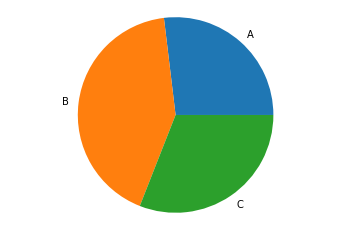

In [144]:
plt.pie([City_A,City_B,City_C], labels=['A','B','C'])
plt.axis('equal')
plt.show()

*FOLLOWING DATA REPRESENTS THE SALES FROM EACH CITY*

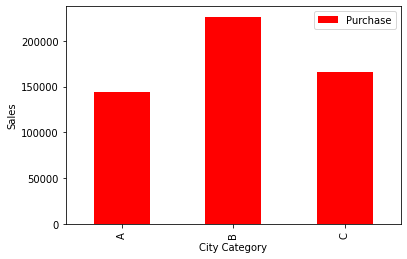

In [145]:
CityCategory =df[['City_Category', 'Purchase']].groupby(['City_Category'],sort = True).count()
CityCategory.plot(kind='bar',color='r')
plt.xlabel("City Category")
plt.ylabel("Sales")
plt.show()